In [27]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Configuração para não ocultar colunas ou linhas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Ler arquivos csv e unir em um único DataFrame

In [3]:
%%time
df_list = []
for csv in os.listdir("../data/"):
    df = pd.read_csv(f"../data/{csv}",
                     dtype = {'plain_cpf_cnpj_financiador': str,
                             'cod_financiador_including_zeroes': str},
                     low_memory=False
                    )
    df = df.set_index("Unnamed: 0")
    df.index.name = ""
    df_list.append(df)
df = pd.concat(df_list)
df.shape

CPU times: user 2.49 s, sys: 188 ms, total: 2.68 s
Wall time: 2.68 s


(337792, 60)

## Entender os tipos dos dados

In [4]:
df.sample(5)

,id,cod_concedente,cod_financiador,cod_gestora,cod_orgao,cod_secretaria,descricao_modalidade,descricao_objeto,descricao_tipo,descricao_url,data_assinatura,data_processamento,data_termino,flg_tipo,isn_parte_destino,isn_sic,num_spu,valor_contrato,isn_modalidade,isn_entidade,tipo_objeto,num_spu_licitacao,descricao_justificativa,valor_can_rstpg,data_publicacao_portal,descricao_url_pltrb,descricao_url_ddisp,descricao_url_inexg,cod_plano_trabalho,num_certidao,descriaco_edital,cpf_cnpj_financiador,num_contrato,valor_original_concedente,valor_original_contrapartida,valor_atualizado_concedente,valor_atualizado_contrapartida,created_at,updated_at,plain_num_contrato,calculated_valor_aditivo,calculated_valor_ajuste,calculated_valor_empenhado,calculated_valor_pago,contract_type,infringement_status,cod_financiador_including_zeroes,accountability_status,plain_cpf_cnpj_financiador,descricao_situacao,data_publicacao_doe,descricao_nome_credor,isn_parte_origem,data_auditoria,data_termino_original,data_inicio,data_rescisao,confidential,gestor_contrato,data_finalizacao_prestacao_contas
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
9192,360371,310101.0,289803,310101,31200001,31000000,PREGÃO,AQUISIÇÃO DE CONSUMO / GÊNEROS ALIMENTÍCIOS PA...,CONTRATO,20190425.1079299.Integra.CONTRATO.pdf,2019-04-25T00:00:00.000-03:00,2023-05-31T10:00:08.000-03:00,2020-04-23T00:00:00.000-03:00,51,438920,1079299,6676808/2018,322353.84,0,1796,Gêneros Alimentícios,66768082018.0,AQUISIÇÃO DE CONSUMO / GÊNEROS ALIMENTÍCIOS PA...,56763.22,0001-01-01T00:00:00.000-02:34,Sem Pltrb,Sem DecDisp,Sem DecInexg,NaN,2018/30786,01. PROCESSO LICITATÓRIO,09.075.014/0001-49,24/2019,322353.84,0.0,403319.95,0.0,2020-05-12T14:14:45.516-03:00,2023-05-31T23:30:20.563-03:00,242019,80966.11,0.0,322353.84,265590.62,contrato,0,00289803,NaN,09075014000149,VENCIDO,2019-05-10T00:00:00.000-03:00,PETISCO DISTRIBUIDORA DE ALIMENTOS EIRELI,203178.0,2022-09-16,2020-04-23T00:00:00.000-03:00,2019-04-25T00:00:00.000-03:00,NaN,False,NaN,NaN
17413,476258,470001.0,809447,470001,47000000,47000000,PREGÃO,Aquisição de fogão e liquidificador.,DESPESA.SEM.INSTRUMENTO.CONTRATUAL,Sem Íntegra,2022-09-26T00:00:00.000-03:00,2023-05-31T10:00:08.000-03:00,2022-12-31T00:00:00.000-03:00,52,601613,1235671,07212828/2022,10427.99,0,3675,"Aquisição de Móveis, Máquinas e Equipamentos (...",24653192021.0,Justificamos que a aquisição do objeto visa at...,0.00,0001-01-01T00:00:00.000-02:34,Sem Pltrb,Sem DecDisp,Sem DecInexg,NaN,2021/01001,19. REGISTRO DE PREÇO,21.802.693/0001-06,NaN,10427.99,0.0,10427.99,0.0,2022-09-28T13:31:41.734-03:00,2023-05-31T19:07:05.890-03:00,NaN,0.00,0.0,10427.99,10427.99,contrato,0,00809447,NaN,21802693000106,VENCIDO,2023-05-08T16:15:01.000-03:00,RE COMERCIO E SERVICOS EIRELI,563954.0,2023-05-08,2022-12-31T00:00:00.000-03:00,2022-09-26T00:00:00.000-03:00,NaN,False,NaN,NaN
21305,407079,241291.0,303646,241291,24200214,24000000,PREGÃO,Aquisição de medicamentos de acordo com ATA 00...,DESPESA.SEM.INSTRUMENTO.CONTRATUAL,Sem Íntegra,2021-02-23T00:00:00.000-03:00,2023-05-31T10:00:08.000-03:00,2021-12-31T00:00:00.000-03:00,52,462397,1157858,02046642/2021,3471.00,0,579,Outros,106920152019.0,Aquisição de medicamentos,0.00,0001-01-01T00:00:00.000-02:34,Sem Pltrb,Sem DecDisp,Sem DecInexg,NaN,2020/00127,19. REGISTRO DE PREÇO,05.106.015/0001-52,NaN,3471.00,0.0,3471.00,0.0,2021-03-02T21:47:51.967-03:00,2023-05-31T21:54:26.063-03:00,NaN,0.00,0.0,3471.00,3471.00,contrato,0,00303646,NaN,05106015000152,VENCIDO,2022-03-23T14:45:16.000-03:00,CALL MED COMERCIO DE MEDICAMENTOS E REPRESENTA...,321252.0,2022-09-16,2021-12-31T00:00:00.000-03:00,2021-02-23T00:00:00.000-03:00,NaN,False,NaN,NaN
18485,353911,228231.0,814787,220001,22000000,22000000,DISPENSA,AQUISIÇÃO DE MATERIAL DE EXPEDIENTE PARA A EEM...,DESPESA.SEM.INSTRUMENTO.CONTRATUAL,20200331.1122467.Declaracao.Dispensa.DESPESA.S...,2020-03-31T00:00:00.000-03:00,2023-05-31T10:00:08.000-03:00,2020-12-31T00:00:00.000-03:00,52,607634,1122467,01407097/2020,4673.28,0,

In [5]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Index: 337792 entries, 0 to 8480
Data columns (total 60 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 337792 non-null  int64  
 1   cod_concedente                     337787 non-null  float64
 2   cod_financiador                    337792 non-null  int64  
 3   cod_gestora                        337792 non-null  int64  
 4   cod_orgao                          337792 non-null  int64  
 5   cod_secretaria                     337792 non-null  int64  
 6   descricao_modalidade               337792 non-null  object 
 7   descricao_objeto                   337792 non-null  object 
 8   descricao_tipo                     337792 non-null  object 
 9   descricao_url                      337792 non-null  object 
 10  data_assinatura                    337792 non-null  object 
 11  data_processamento                 337792 non-

## Conversão para tipos de dados mais eficientes

### Datetime
Transforma string em datetime, tendo como ponto de partida o formato do dado

In [6]:
%%time
df["data_assinatura"] = pd.to_datetime(df["data_assinatura"])
df["data_processamento"] = pd.to_datetime(df["data_processamento"])
df["data_termino"] = pd.to_datetime(df["data_termino"], errors = 'coerce')
df["data_publicacao_doe"] = pd.to_datetime(df["data_publicacao_doe"], format="ISO8601", errors = 'coerce')
df["data_auditoria"] = pd.to_datetime(df["data_auditoria"], format="%Y-%m-%d", errors = 'coerce')
df["data_termino_original"] = pd.to_datetime(df["data_termino_original"], errors = 'coerce')
df["data_inicio"] = pd.to_datetime(df["data_inicio"], errors = 'coerce')
df["data_rescisao"] = pd.to_datetime(df["data_rescisao"], utc=False,  errors = 'coerce')
df["data_finalizacao_prestacao_contas"] = pd.to_datetime(df["data_finalizacao_prestacao_contas"], errors = 'coerce')
df["created_at"] = pd.to_datetime(df["created_at"])
df["updated_at"] = pd.to_datetime(df["updated_at"])

CPU times: user 2.55 s, sys: 18.9 ms, total: 2.56 s
Wall time: 2.56 s


In [7]:
# Verifica efeito da alteração do tipo no uso de memória
df.info(verbose=False, memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Index: 337792 entries, 0 to 8480
Columns: 60 entries, id to data_finalizacao_prestacao_contas
dtypes: datetime64[ns, UTC-03:00](9), datetime64[ns](2), float64(14), int64(11), object(24)
memory usage: 701.0 MB


### Integer

In [8]:
%%time
int_cols = list(df.select_dtypes(include=['int']).columns)
int_dtypes = {
    "int8": 127,
    "int16": 32767,
    "int32": 2147483647
}
for col in int_cols:
    _max = df[col].max()
    _min = df[col].min()

    if _max <= int_dtypes["int8"] and _min >= -int_dtypes["int8"]:
        df[col] = df[col].astype("int8")
        
    elif _max <= int_dtypes["int16"] and _min >= -int_dtypes["int16"]:
        df[col] = df[col].astype("int16")
    elif _max <= int_dtypes["int32"] and _min >= -int_dtypes["int32"]:
        df[col] = df[col].astype("int32")
    else:
        df[col] = df[col].astype("int64")
    

CPU times: user 20.4 ms, sys: 12.7 ms, total: 33.1 ms
Wall time: 30.7 ms


In [9]:
# Verifica efeito da alteração do tipo no uso de memória
df.info(verbose=False, memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Index: 337792 entries, 0 to 8480
Columns: 60 entries, id to data_finalizacao_prestacao_contas
dtypes: datetime64[ns, UTC-03:00](9), datetime64[ns](2), float64(14), int16(1), int32(6), int64(1), int8(3), object(24)
memory usage: 684.5 MB


### Categorical

In [10]:
%%time
object_cols = list(df.select_dtypes(include=['object']).columns)
for col in object_cols:
    _len = len(df[col].unique())
    if _len <= 50:
        df[col] = df[col].astype("category")
    else:
        df[col] = df[col].astype(str)

CPU times: user 627 ms, sys: 67.6 ms, total: 694 ms
Wall time: 694 ms


In [11]:
# Verifica efeito da alteração do tipo no uso de memória
df.info(verbose=False, memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Index: 337792 entries, 0 to 8480
Columns: 60 entries, id to data_finalizacao_prestacao_contas
dtypes: category(9), datetime64[ns, UTC-03:00](9), datetime64[ns](2), float64(14), int16(1), int32(6), int64(1), int8(3), object(15)
memory usage: 549.7 MB


# Analise exploratória

## Modalidade

In [52]:
df_modalidade = df.groupby("descricao_modalidade", observed=True)["calculated_valor_pago"]\
    .agg(["mean", "sum"]).reset_index()\
    .sort_values(by="sum", ascending=False)

# Tabela
df_modalidade.style.format({"mean": 'R$ {:.2f}', "sum": 'R$ {:.2f}'}, na_rep='MISS', precision=2) 

,descricao_modalidade,mean,sum
9,PREGÃO,R$ 190244.71,R$ 27765074647.54
7,GESTÃO,R$ 51891098.78,R$ 14996527546.57
6,DISPENSA,R$ 116013.03,R$ 11327744119.45
3,CONCORRÊNCIA,R$ 8522120.90,R$ 10183934472.11
8,INEXIGIBILIDADE,R$ 330560.50,R$ 4122419998.51
5,DEFINIDA POR ORGANISMO FINANCIADOR,R$ 4030947.04,R$ 3164293423.63
12,RATEIO,R$ 2572475.35,R$ 1934501459.78
13,REGIME DIFERENCIADO DE CONTRATAÇÃO - RDC,R$ 6162769.42,R$ 1503715737.52
10,PREGÃO ELETRÔNICO,R$ 54913.47,R$ 1273388379.24
0,CARTA CONVITE,R$ 18159.54,R$ 951523629.42


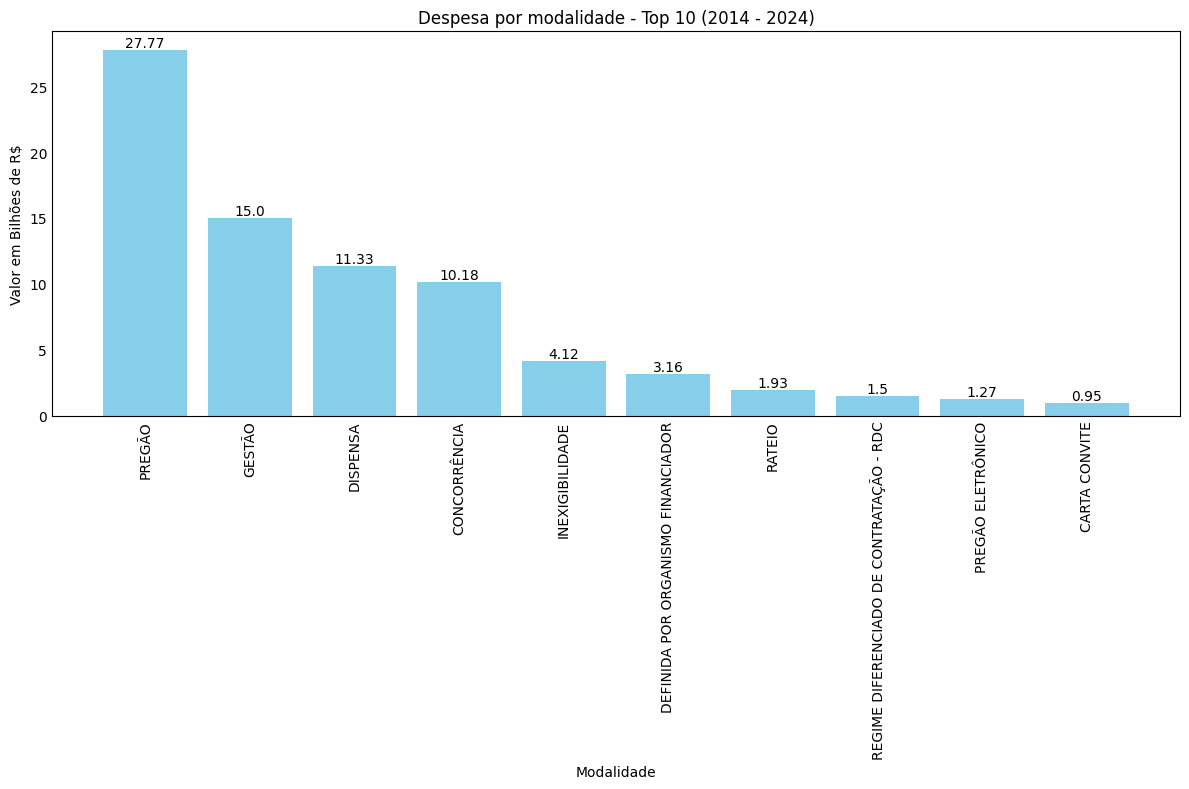

In [58]:
# Gráfico
top10_modalidade_despesa = df_modalidade
top10_modalidade_despesa["sum_bilhao"] = round(top10_modalidade_despesa["sum"] / 10**9, 2)
top10_modalidade_despesa = top10_modalidade_despesa.sort_values(by="sum_bilhao", ascending=False).head(10)

plt.figure(figsize=(12,8))
bars = plt.bar(
    top10_modalidade_despesa["descricao_modalidade"],
    top10_modalidade_despesa["sum_bilhao"],
    color="skyblue"
)

for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        yval,
        yval,
        ha = "center",
        va = "bottom"
    )
plt.title("Despesa por modalidade - Top 10 (2014 - 2024)")
plt.xlabel("Modalidade")
plt.ylabel("Valor em Bilhões de R$")

plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

## Situação

In [55]:
df_situacao = df.groupby("descricao_situacao", observed=True)["calculated_valor_pago"]\
    .agg(["mean", "sum"])\
    .reset_index()\
    .sort_values(by="sum", ascending=False)
df_situacao.style.format({"mean": 'R$ {:.2f}', "sum": 'R$ {:.0f}'}, na_rep='MISS', precision=2)

,descricao_situacao,mean,sum
7,VENCIDO,R$ 151847.81,R$ 42581313504
4,EM EXECUÇÃO - NORMAL,R$ 470845.88,R$ 23678368272
2,CONCLUÍDO COM DÍVIDA,R$ 1439069.90,R$ 6136194054
0,AGUARDANDO PUBLICAÇÃO DO ADITIVO,R$ 3901959.25,R$ 3117665438
1,CONCLUÍDO,R$ 1744847.23,R$ 2133948166
5,RESCINDIDO,R$ 1027474.35,R$ 667858328
6,RESCINDIDO COM DÍVIDA,R$ 2032637.14,R$ 235785908
3,EM EXECUÇÃO - BLOQUEADO SOLICITAÇÃO DE PARCELA,R$ 1119.83,R$ 2240


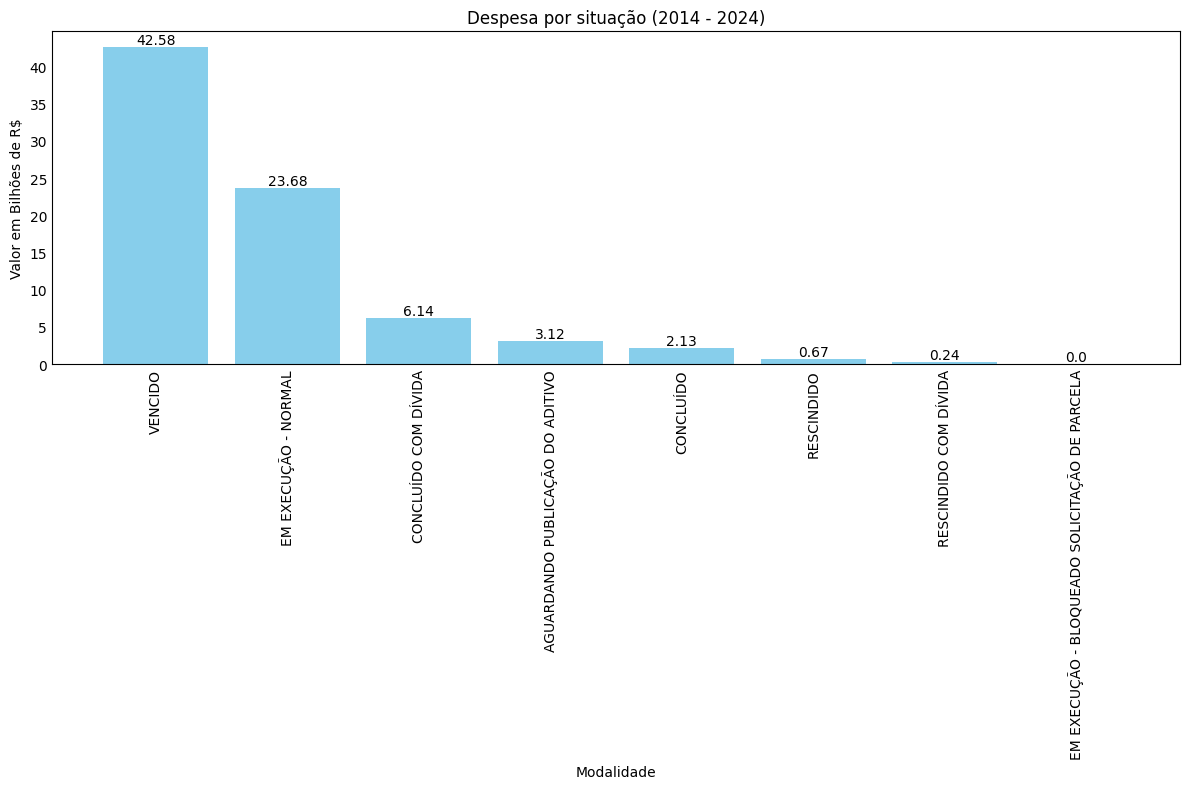

In [59]:
# Gráfico
df_situacao["sum_bilhao"] = round(df_situacao["sum"] / 10**9, 2)
df_situacao = df_situacao.sort_values(by="sum_bilhao", ascending=False)


plt.figure(figsize=(12,8))
bars = plt.bar(
    df_situacao["descricao_situacao"],
    df_situacao["sum_bilhao"],
    color="skyblue"
)

for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        yval,
        yval,
        ha = "center",
        va = "bottom"
    )
plt.title("Despesa por situação (2014 - 2024)")
plt.xlabel("Modalidade")
plt.ylabel("Valor em Bilhões de R$")

plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

## Edital

In [61]:
df_eidtal = df.groupby("descriaco_edital", observed=True)["calculated_valor_pago"]\
    .agg(["mean", "sum"])\
    .reset_index()\
    .sort_values(by="sum", ascending=False)
df_eidtal.style.format({"mean": 'R$ {:.2f}', "sum": 'R$ {:.2f}'}, na_rep='MISS', precision=2)

,descriaco_edital,mean,sum
0,01. PROCESSO LICITATÓRIO,R$ 335237.89,R$ 60594249132.93
1,19. REGISTRO DE PREÇO,R$ 72308.74,R$ 10963017009.12
2,22.TERMO DE ADESÃO A REGISTRO DE PREÇO EXTERNO (CARONA),R$ 721240.02,R$ 2752251919.25
5,34. CONTRATOS DE RATEIO,R$ 2572475.35,R$ 1934501459.78
3,26.CONTRATO PARA SUBVENÇÃO ECONÔMICA/TERMO DE COMPROMISSO,R$ 1531460.44,R$ 814736952.62
4,33. CONTRATOS DE GESTÃO,R$ 31317929.44,R$ 407133082.77
6,42. CONTRATO DE PATROCÍNIO,R$ 215330.43,R$ 54263268.08


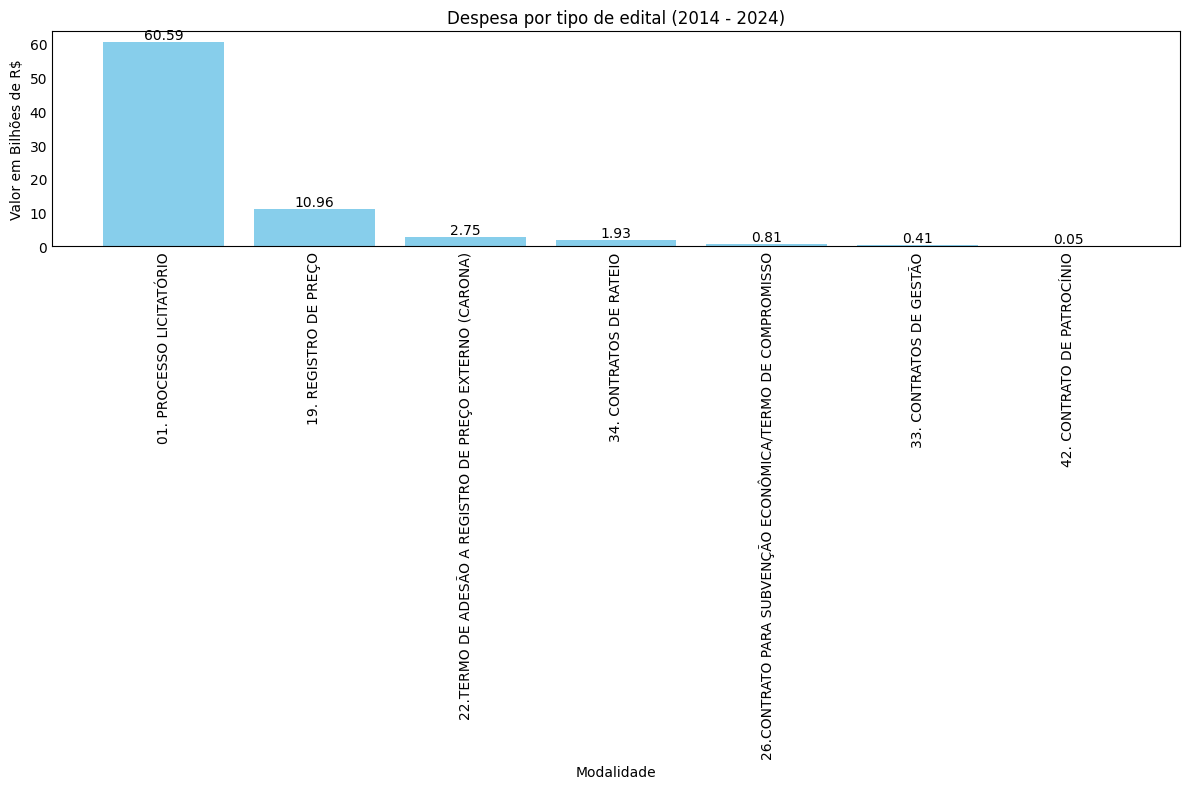

In [62]:
# Gráfico
df_eidtal["sum_bilhao"] = round(df_eidtal["sum"] / 10**9, 2)
df_eidtal = df_eidtal.sort_values(by="sum_bilhao", ascending=False)


plt.figure(figsize=(12,8))
bars = plt.bar(
    df_eidtal["descriaco_edital"],
    df_eidtal["sum_bilhao"],
    color="skyblue"
)

for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        yval,
        yval,
        ha = "center",
        va = "bottom"
    )
plt.title("Despesa por tipo de edital (2014 - 2024)")
plt.xlabel("Modalidade")
plt.ylabel("Valor em Bilhões de R$")

plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

## Objeto

In [63]:
df_objeto = df.groupby("tipo_objeto", observed=True)["calculated_valor_pago"]\
    .agg(["mean", "sum"])\
    .reset_index()\
    .sort_values(by="sum", ascending=False)
df_objeto.style.format({"mean": 'R$ {:.2f}', "sum": 'R$ {:.2f}'}, na_rep='MISS', precision=2)

,tipo_objeto,mean,sum
16,Outros,R$ 189056.44,R$ 47209851953.74
15,Obras e Serviços de Engenharia,R$ 3296464.24,R$ 13139706456.04
12,Locação/Terceirização de Mão-de-obra,R$ 6301967.71,R$ 9377327957.89
2,"Aquisição de Móveis, Máquinas e Equipamentos (Matl Permanente)",R$ 179000.39,R$ 1245126736.57
7,Gêneros Alimentícios,R$ 28416.36,R$ 1105680706.31
0,Aquisição de Equipamentos e Material de Informática,R$ 396692.44,R$ 1006012030.21
6,Energia Elétrica,R$ 2143430.31,R$ 930248752.91
4,Combustíveis e Lubrificantes,R$ 2863063.06,R$ 910454053.36
18,"Peças, Acessórios e Manutenção de Veículos",R$ 409716.84,R$ 710449008.37
19,Serviços de Consultoria,R$ 1164113.64,R$ 522687026.51


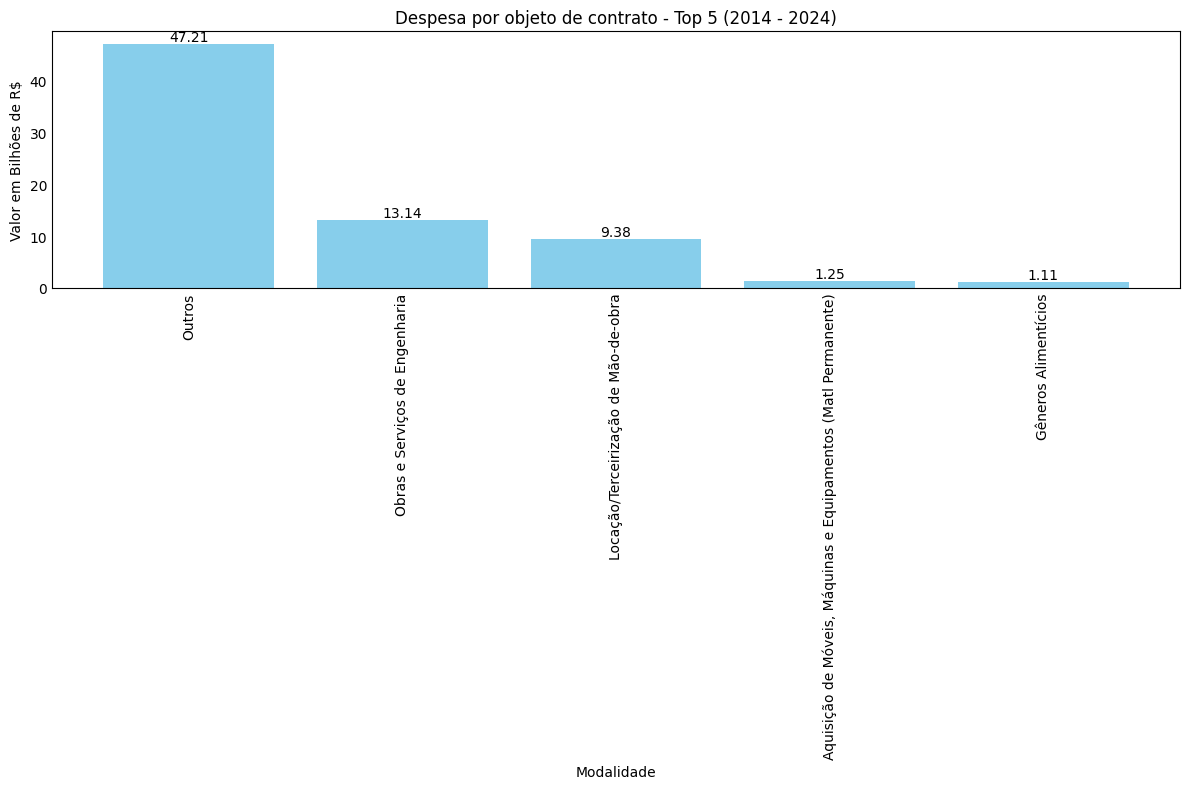

In [65]:
# Gráfico
df_objeto["sum_bilhao"] = round(df_objeto["sum"] / 10**9, 2)
df_objeto = df_objeto.sort_values(by="sum_bilhao", ascending=False).head(5)


plt.figure(figsize=(12,8))
bars = plt.bar(
    df_objeto["tipo_objeto"],
    df_objeto["sum_bilhao"],
    color="skyblue"
)

for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        yval,
        yval,
        ha = "center",
        va = "bottom"
    )
plt.title("Despesa por objeto de contrato - Top 5 (2014 - 2024)")
plt.xlabel("Modalidade")
plt.ylabel("Valor em Bilhões de R$")

plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

## Tipo

In [66]:
df_tipo = df.groupby("descricao_tipo", observed=True)["calculated_valor_pago"]\
    .agg(["mean", "sum"])\
    .reset_index()\
    .sort_values(by="sum", ascending=False)
df_tipo.style.format({"mean": 'R$ {:.2f}', "sum": 'R$ {:.2f}'}, na_rep='MISS', precision=2)

,descricao_tipo,mean,sum
0,CONTRATO,R$ 687894.72,R$ 72867311834.40
2,DESPESA.SEM.INSTRUMENTO.CONTRATUAL,R$ 21049.87,R$ 4869087122.63
1,CONTRATO.SUBVENCAO,R$ 1531460.44,R$ 814736952.62


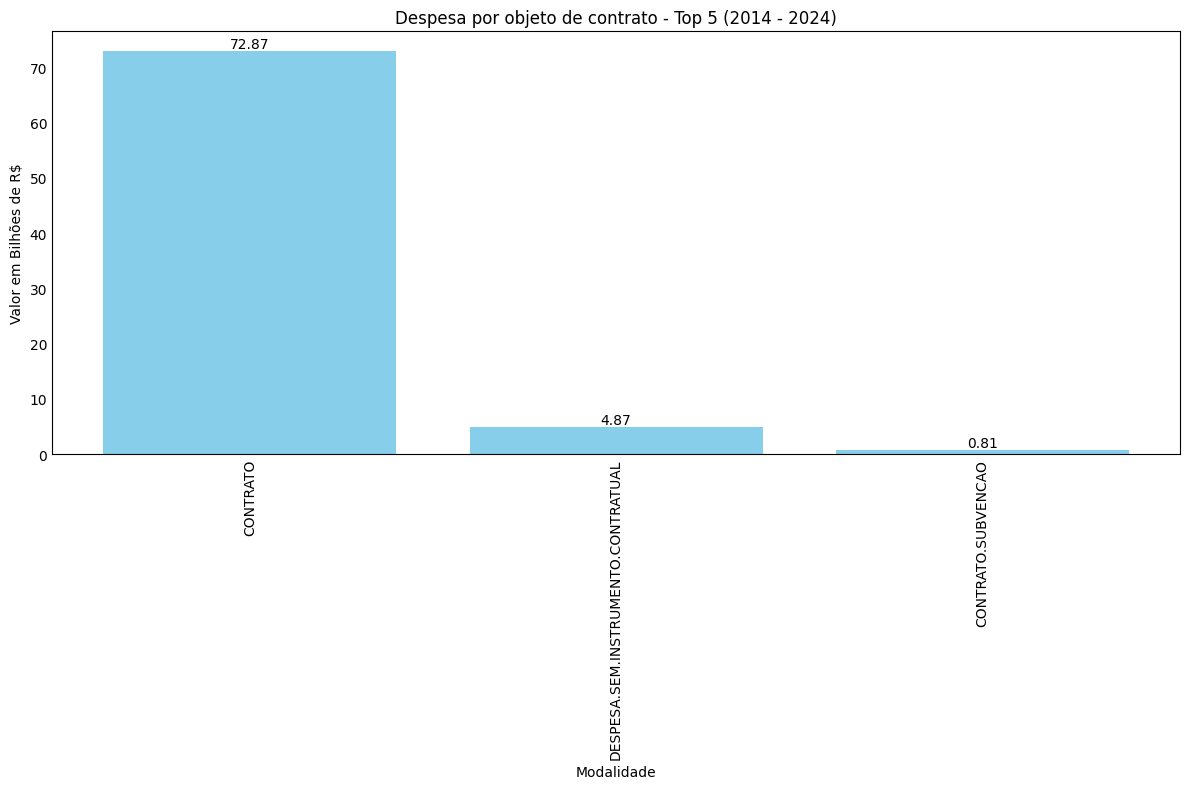

In [67]:
# Gráfico
df_tipo["sum_bilhao"] = round(df_tipo["sum"] / 10**9, 2)
df_tipo = df_tipo.sort_values(by="sum_bilhao", ascending=False).head(5)


plt.figure(figsize=(12,8))
bars = plt.bar(
    df_tipo["descricao_tipo"],
    df_tipo["sum_bilhao"],
    color="skyblue"
)

for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        yval,
        yval,
        ha = "center",
        va = "bottom"
    )
plt.title("Despesa por tipo de contrato (2014 - 2024)")
plt.xlabel("Modalidade")
plt.ylabel("Valor em Bilhões de R$")

plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

## Data assinatura do contrato

In [69]:
df["year"] = df['data_assinatura'].dt.year
df_assinatura = df.groupby("year", observed=True)["calculated_valor_pago"]\
    .count().alias("qtd")\
    .reset_index()\
    .sort_values(by="year", ascending=False)
# df_assinatura.style.format({"mean": 'R$ {:.2f} Mi', "sum": 'R$ {:.0f} Mi'}, na_rep='MISS', precision=2)

AttributeError: 'Series' object has no attribute 'alias'

In [81]:
df["year"] = df['data_assinatura'].dt.year
df_assinatura = df.groupby("year", observed=True)["id"].count()\
    .reset_index(name="qtd")\
    .sort_values(by="year", ascending=True)
df_assinatura

,year,qtd
0,2014,26469
1,2015,22665
2,2016,20497
3,2017,26393
4,2018,28568
5,2019,40611
6,2020,34681
7,2021,36858
8,2022,46485
9,2023,46084


<Axes: title={'center': 'Título'}, xlabel='X LAbel', ylabel='Y LAbel'>

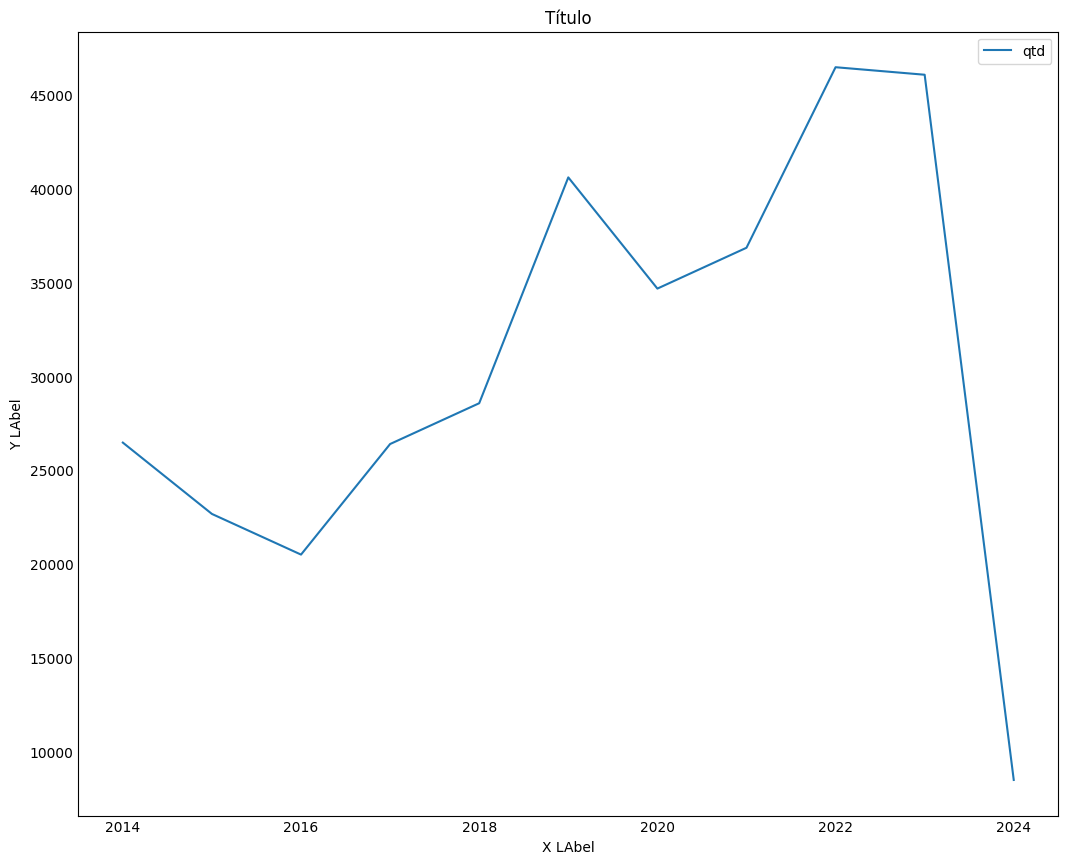

In [90]:
df_assinatura.plot(
    kind = "line",
    x = "year",
    y = "qtd",
    figsize = (10,8),
    title = "Título",
    xlabel= "X LAbel",
    ylabel= "Y LAbel"
    
)

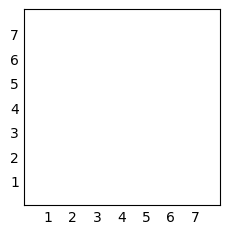

In [79]:
# plot
fig, ax = plt.subplots()

ax.plot(
    df_assinatura["year"], 
    df_assinatura["qtd"], 
    linewidth=2.0)

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()

## Tipo

In [98]:
df["year"] = df['data_assinatura'].dt.year
df["month"] = df['data_assinatura'].dt.month

df["year-month"] = df['data_assinatura'].dt.strftime('%Y-%m')

df_assinatura_mes = df.groupby(["year-month"], observed=True)["calculated_valor_pago"]\
    .agg(["mean", "sum"]).div(1000000)\
    .reset_index()\
    .sort_values(by=["year-month"], ascending=True)
# df_assinatura_mes.style.format({"mean": 'R$ {:.2f} Mi', "sum": 'R$ {:.0f} Mi'}, na_rep='MISS', precision=2)
# df_assinatura_mes

<Axes: title={'center': 'Título'}, xlabel='X LAbel', ylabel='Y LAbel'>

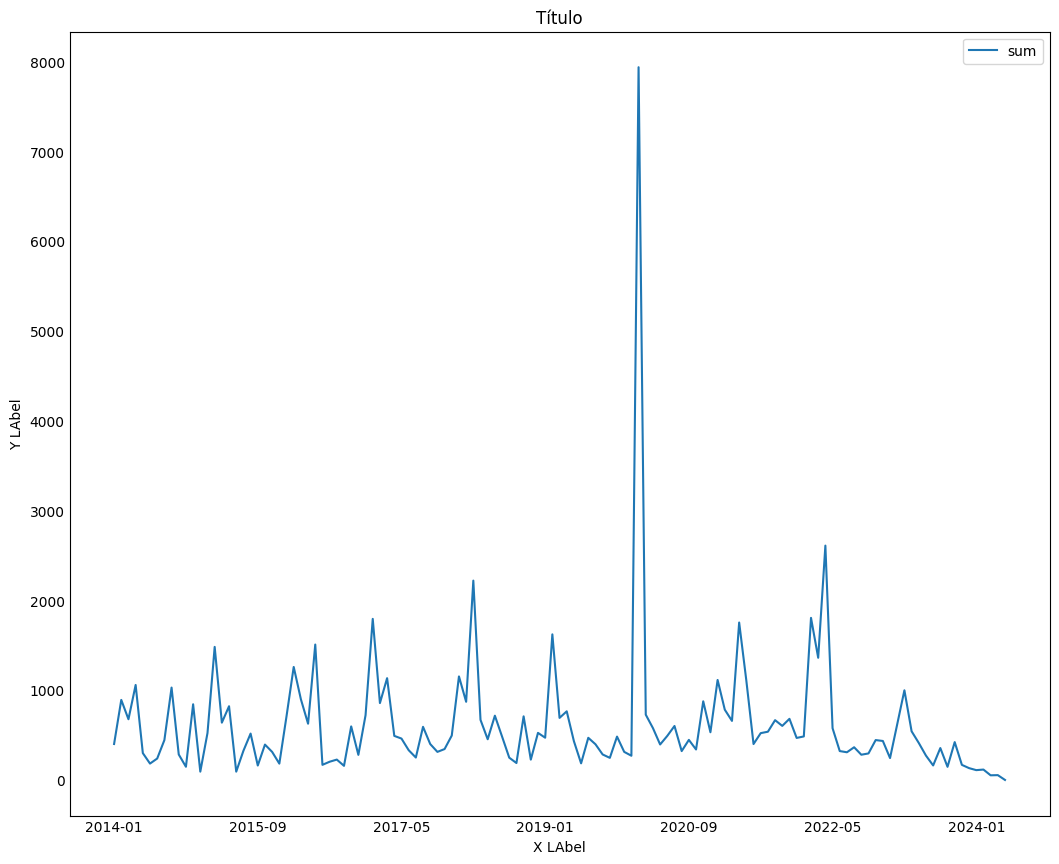

In [99]:
df_assinatura_mes.plot(
    kind = "line",
    x = "year-month",
    y = "sum",
    figsize = (10,8),
    title = "Título",
    xlabel= "X LAbel",
    ylabel= "Y LAbel"  
)

## Assinaturas 2020

In [106]:
df_assinatura_mes_2023 = df[df["year"] == 2020].groupby(["month"], observed=True)["calculated_valor_pago"]\
    .agg(["mean", "sum"]).div(1000000)\
    .reset_index()\
    .sort_values(by=["month"], ascending=True)
df_assinatura_mes_2023.style.format({"mean": 'R$ {:.2f} Mi', "sum": 'R$ {:.0f} Mi'}, na_rep='MISS', precision=2)

,month,mean,sum
0,1,R$ 0.25 Mi,R$ 270 Mi
1,2,R$ 2.49 Mi,R$ 7938 Mi
2,3,R$ 0.14 Mi,R$ 727 Mi
3,4,R$ 0.23 Mi,R$ 577 Mi
4,5,R$ 0.20 Mi,R$ 395 Mi
5,6,R$ 0.17 Mi,R$ 491 Mi
6,7,R$ 0.33 Mi,R$ 601 Mi
7,8,R$ 0.15 Mi,R$ 321 Mi
8,9,R$ 0.11 Mi,R$ 446 Mi
9,10,R$ 0.06 Mi,R$ 339 Mi


<Axes: title={'center': 'Despesas por mês (2020)'}, xlabel='Mês', ylabel='Valor em Milhões de R$'>

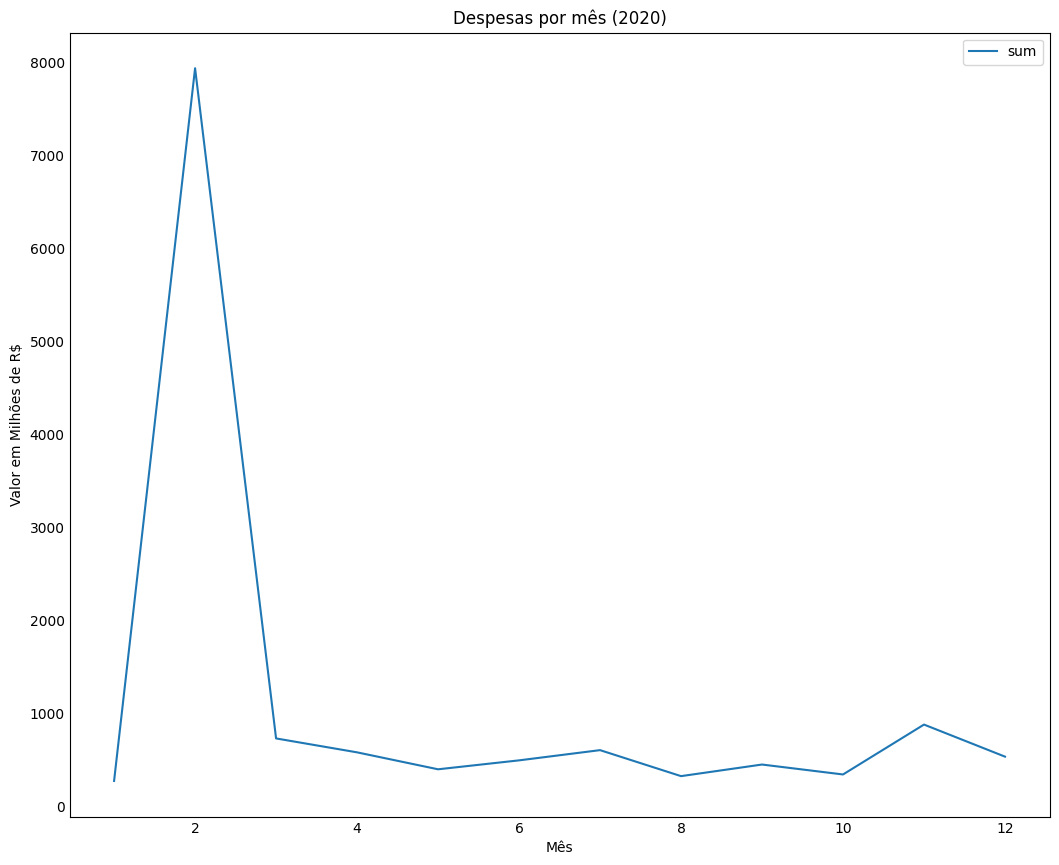

In [108]:
df_assinatura_mes_2023.plot(
    kind = "line",
    x = "month",
    y = "sum",
    figsize = (10,8),
    title = "Despesas por mês (2020)",
    xlabel= "Mês",
    ylabel= "Valor em Milhões de R$"  
)

## Tipo

In [25]:
df["duracao"] = (df["data_termino"] - df["data_assinatura"]) / np.timedelta64(1, 'D')
df["duracao"].describe()

count    337785.000000
mean        284.901079
std         246.609200
min         -73.000000
25%         155.000000
50%         271.000000
75%         364.000000
max       11693.000000
Name: duracao, dtype: float64

In [ ]:
# descricao_justificativa 

df[df["descricao_modalidade"] == "DISPENSA"][["descricao_justificativa", "cod_orgao", "calculated_valor_pago"]].sample(20)\
.style.format({"calculated_valor_pago": 'R$ {:.2f}'}, na_rep='MISS', precision=2)

# Salvar o dataset

In [ ]:
df.to_parquet("dataset.parquet")

In [ ]:
df.to_csv("dataset.csv", encoding="utf-8", index=False)

In [ ]:
df.shape

# Comparativo entre formatos de arquivo

In [ ]:
%%time
par_df = pd.read_parquet("dataset.parquet")
par_df.shape

In [ ]:
%%time
csv_df = pd.read_csv("dataset.csv", low_memory=False)
csv_df.shape